# Pymaceuticals Inc.
---

### Analysis

As found in included figures:
- Capomulin and Ramicane had the most success in tumor shrinkage and mice longevity 
- Closer look at Mouse g316 in Capomulin regimen is an example of this
- Note that Capomulin mice had a positive correlation between weight and tumor volume
    - less weight - smaller tumors, more weight - larger tumors
    
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pyma = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])
pyma.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_count = len(pyma["Mouse ID"].unique())
mice_count

249

In [3]:
pyma.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
pyma = pyma[["Mouse ID",'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
             'Drug Regimen','Sex', 'Age_months', 'Weight (g)']]
pyma.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = pyma.groupby('Mouse ID')['Timepoint'].apply(lambda x: x[x.duplicated()])
dupes.unstack()

,137,360,681,869,1111
Mouse ID,,,,,
g989,0,5,10,15,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes = pyma[pyma['Mouse ID'] == 'g989'].sort_values(by='Mouse ID')
dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_pyma = pyma[pyma['Mouse ID'] != 'g989']
complete_pyma

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_counts = complete_pyma["Mouse ID"].nunique()
mice_counts

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


summary_mean = complete_pyma.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_median = complete_pyma.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_variance = complete_pyma.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof=0)
summary_sd = complete_pyma.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(ddof=0)
summary_sem = complete_pyma.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_complete = pd.DataFrame({'Mean Tumor Volume': summary_mean,
                                'Median Tumor Volume': summary_median,
                                'Tumor Volume Variance': summary_variance,
                                'Tumor Volume Std Dev': summary_sd,
                                'Tumor Volume  Std Err': summary_sem})

summary_complete

# print(f"summary mean: {summary_mean}")

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = complete_pyma.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
summary_stats.reset_index(inplace=True)
mean = summary_stats['mean']
median = summary_stats['50%']
std_deviation = summary_stats['std']
variance = summary_stats['std']**2
std_error = std_deviation / (summary_stats['count']**0.5)
summary_stats['var'] = variance
summary_stats['sem'] = std_error
summary_stats = summary_stats[['Drug Regimen', 'mean', '50%', 'var', 'std', 'sem']]
summary_stats = summary_stats.rename(columns={'50%': 'median'})
summary_stats.set_index('Drug Regimen', inplace=True)
summary_stats

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = complete_pyma.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'median': '50%'}).reset_index()
summary_stats.set_index('Drug Regimen',inplace=True)
summary_stats

,mean,50%,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


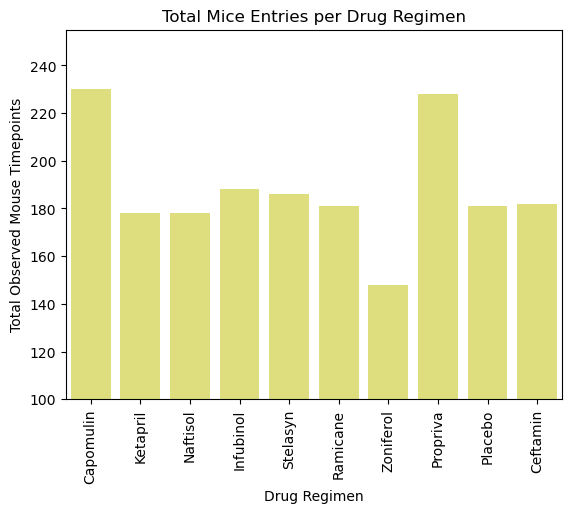

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs = complete_pyma['Drug Regimen'].unique()
drugs
total_mice = complete_pyma.groupby('Drug Regimen')['Mouse ID'].count()
print(total_mice)
x_axis= np.arange(0,len(total_mice))

plt.bar(x_axis, total_mice, color = 'y', alpha = 0.5, align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation= 'vertical')

plt.xlim(-.5, len(x_axis)-.5)
plt.ylim(100, max(total_mice)+25)

plt.title('Total Mice Entries per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Observed Mouse Timepoints')

plt.show()

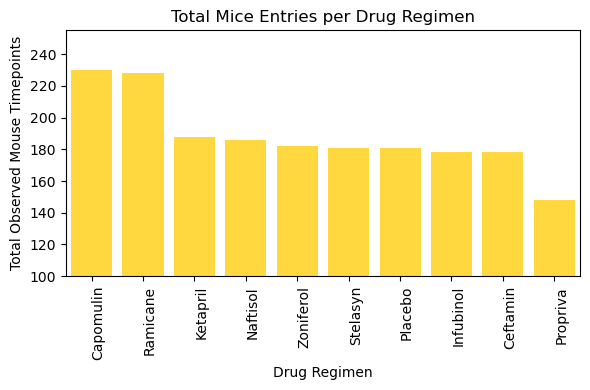

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_data = complete_pyma['Drug Regimen'].value_counts()
drug_data
figure2 = drug_data.plot(kind = 'bar', width = .8, facecolor = '#FFCC00', alpha = 0.75, figsize = (6,4),
                        title = 'Total Mice Entries per Drug Regimen',
                        xlabel = 'Drug Regimen',
                        ylabel = 'Total Observed Mouse Timepoints')
xticklabels = drug_data.index
figure2.set_xticklabels(xticklabels, rotation = 90, rotation_mode = 'anchor', ha = 'right', wrap = True)
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(100, max(total_mice)+25)
plt.tight_layout()
plt.savefig('total_mice_per_drug_regimen.png')
plt.show()

In [13]:
pie_pyma = complete_pyma.drop_duplicates(subset = ['Mouse ID'])
pie_pyma['Mouse ID'].count()

248

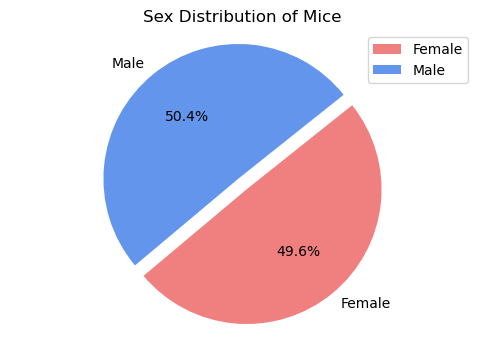

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = pie_pyma['Sex'].unique()

female_pyma = pie_pyma[pie_pyma['Sex'] == 'Female'].count()[0]
male_pyma = pie_pyma[pie_pyma['Sex'] == 'Male'].count()[0]
colors = ['lightcoral', 'cornflowerblue']
explode = (0.1,0)

pie = pd.DataFrame([female_pyma, male_pyma], index = labels)
pie.plot(kind = "pie", subplots = True, colors = colors, figsize = (6,4),autopct = "%1.1f%%", startangle = 220, explode = explode)
plt.title('Sex Distribution of Mice')
plt.gca().set_axis_off()
plt.axis('equal')
plt.savefig('sex_distribution_of_mice.png')
plt.show()

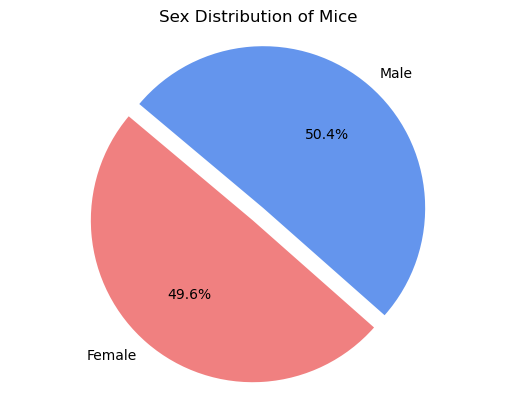

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pie_pyma['Sex'].unique()
labels

female_pyma = pie_pyma[pie_pyma['Sex'] == 'Female'].count()[0]
male_pyma = pie_pyma[pie_pyma['Sex'] == 'Male'].count()[0]

pies = [female_pyma, male_pyma]
colors = ['lightcoral', 'cornflowerblue']
explode = (0.1,0)

plt.pie(pies, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 140, explode = explode)
plt.axis('equal')
plt.title('Sex Distribution of Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Start by getting the last (greatest) timepoint for each mouse
grouped_pyma = complete_pyma.groupby(['Drug Regimen', 'Mouse ID']).agg({'Tumor Volume (mm3)': 'last', 'Timepoint': 'max'}).reset_index()
grouped_pyma

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_pyma = grouped_pyma[grouped_pyma['Drug Regimen'].isin(drugs)]
filtered_pyma.set_index('Drug Regimen', inplace=True)
filtered_pyma

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Capomulin,b128,38.982878,45
Capomulin,b742,38.939633,45
Capomulin,f966,30.485985,20
Capomulin,g288,37.074024,45
Capomulin,g316,40.159220,45
...,...,...,...
Ramicane,s508,30.276232,45
Ramicane,u196,40.667713,45
Ramicane,w678,43.166373,5


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
for drug in drugs:

# Create empty list to fill with tumor vol data (for plotting)
    outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    tumor_vol = filtered_pyma.loc[drug, 'Tumor Volume (mm3)']
    q1 = round(tumor_vol.quantile(0.25),3)
    q3 = round(tumor_vol.quantile(0.75),3)
    iqr = round(q3 - q1,3)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = filtered_pyma.loc[drug, 'Tumor Volume (mm3)']
    
    # add subset 
    outliers.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(q1 - 1.5 * iqr,3)
    upper_bound = round(q3 + 1.5 * iqr,3)
    potential_outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    outliers.extend(potential_outliers)
    print(f"Drug: {drug}")
    print(f"Potential Outliers: {potential_outliers}")
    print("-----------------------------------")

Drug: Capomulin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------
Drug: Ceftamin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------
Drug: Infubinol
Potential Outliers: Drug Regimen
Infubinol    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------------
Drug: Ramicane
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-----------------------------------


In [18]:
filtered_pyma.columns

Index(['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint'], dtype='object')

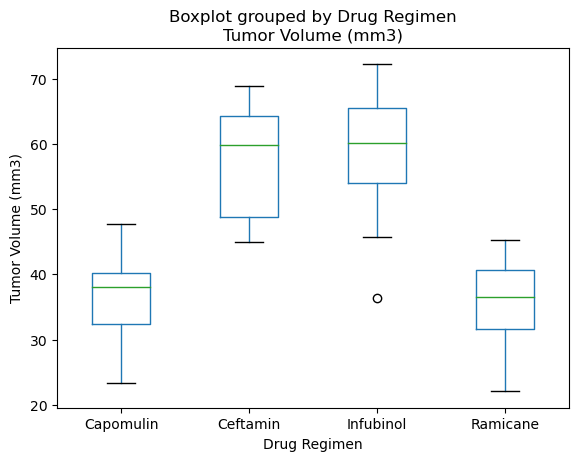

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

filtered_pyma.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(visible = False)
plt.savefig('boxplot_drug_regimen_and_tumor_volume.png')
plt.show()

## Line and Scatter Plots

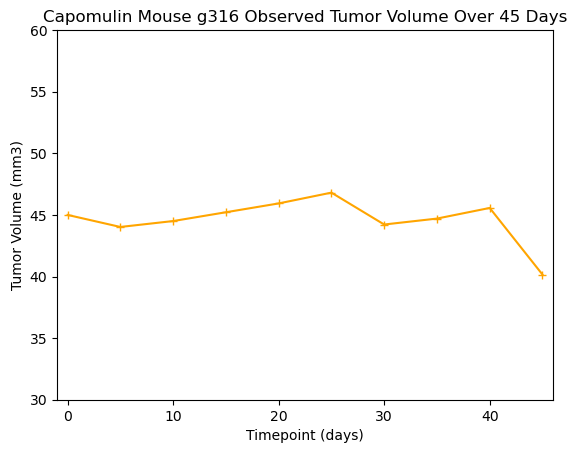

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
g316= complete_pyma[complete_pyma['Mouse ID']=='g316']
g316_tumor = g316['Tumor Volume (mm3)']
g316_time = g316['Timepoint']

g316_line = plt.plot(g316_time, g316_tumor, marker = '+', color = "orange", label = 'Capomulin Mouse g316')
plt.ylim(30,60)
plt.xlim(-1,46)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin Mouse g316 Observed Tumor Volume Over 45 Days")
plt.savefig('g316_line.png')
plt.show()

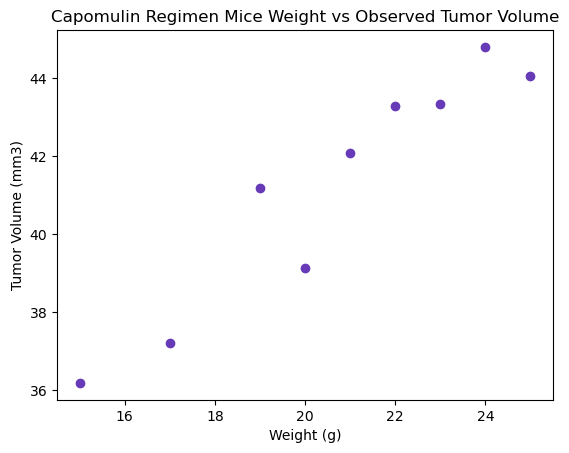

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = complete_pyma[complete_pyma['Drug Regimen'] == 'Capomulin']
grouped = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
cap_weight = grouped.index
cap_tumor_volume = grouped.values
plt.scatter(cap_weight, cap_tumor_volume, color = '#673AB7')
plt.title('Capomulin Regimen Mice Weight vs Observed Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient between Weight and Tumor Volume during Capomulin regimen is 0.95


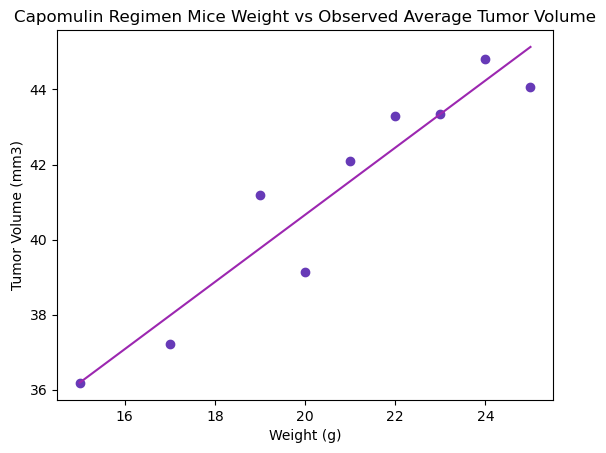

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"Correlation coefficient between Weight and Tumor Volume during Capomulin regimen is {round(st.pearsonr(cap_weight,cap_tumor_volume)[0],2)}")

slope, intercept, r_value, p_value, std_err = stats.linregress(cap_weight, cap_tumor_volume)
predicted_tumor_volume = slope * cap_weight + intercept
plt.scatter(cap_weight, cap_tumor_volume, color = '#673AB7')
plt.plot(cap_weight, predicted_tumor_volume, color='#9C27B0', linestyle='-')
plt.title('Capomulin Regimen Mice Weight vs Observed Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('capomulin_weight_vs_observed_tumor_average.png')
plt.show()